<a href="https://colab.research.google.com/github/roydendsouza31/AI-Generated-Images-vs-Real-Images/blob/R3/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Generated Images vs Real Images

Creating the dataset

In [76]:
#Creating folders to store the training and testing datasets
! mkdir -p /content/dataset_train/AIGenerated
! mkdir -p /content/dataset_train/Real
! mkdir -p /content/dataset_test/AIGenerated
! mkdir -p /content/dataset_test/Real

# **Getting the CIFAKE dataset**

In [75]:
#Downloading the CIFAKE dataset from kaggle
from google.colab import drive
drive.mount('/content/drive')

!pip install kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images

import zipfile

# Define the path to your zip file
file_path = '/content/cifake-real-and-ai-generated-synthetic-images.zip'  # Replace 'your_file.zip' with your file's name

!mkdir CIFAKE

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/CIFAKE')  # Replace 'destination_folder' with your desired folder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cifake-real-and-ai-generated-synthetic-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [84]:
#Moving the images from the CIFAKE dataset to their respective folders
!mv ./CIFAKE/train/FAKE/* ./dataset_train/AIGenerated
!rmdir /content/CIFAKE/train/FAKE
!mv ./CIFAKE/train/REAL/* ./dataset_train/Real
!rmdir /content/CIFAKE/train/REAL
!rmdir /content/CIFAKE/train

!mv ./CIFAKE/test/FAKE/* ./dataset_test/AIGenerated
!rmdir /content/CIFAKE/test/FAKE
!mv ./CIFAKE/test/REAL/* ./dataset_test/Real
!rmdir /content/CIFAKE/test/REAL
!rmdir /content/CIFAKE/test
!rmdir /content/CIFAKE

mv: cannot stat './CIFAKE/train/FAKE/*': No such file or directory
rmdir: failed to remove '/content/CIFAKE/train/FAKE': No such file or directory
mv: cannot stat './CIFAKE/train/REAL/*': No such file or directory
rmdir: failed to remove '/content/CIFAKE/train/REAL': No such file or directory
rmdir: failed to remove '/content/CIFAKE/train': No such file or directory


In [2]:
! pip install simple_image_download
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
from simple_image_download import simple_image_download as simp
import random
import PIL
import pickle

In [3]:
response = simp.simple_image_download
limit = 100

In [4]:
response().download("ai generated art", 100)
response().download("ai generated images", 100)
response().download("ai generated characters", 100)
response().download('stable diffusion', 100)
response().download('dalle2 generated images', 100)
response().download('midjourney', 100)
response().download('cityscapes', 100)
response().download('animals', 100)
response().download('vehicles', 50)
response().download('traffic', 50)
response().download('offices', 30)
response().download('real food images', 50)
response().download('landscape', 13)

HTTPConnectionPool(host='no.access', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7c962c5cdd50>: Failed to resolve 'no.access' ([Errno -2] Name or service not known)"))


In [17]:
!mv /content/simple_images/ai\ generated\ art/* /content/dataset_train/ai_generated
!mv /content/simple_images/ai\ generated\ characters/* /content/dataset_train/ai_generated
!mv /content/simple_images/ai\ generated\ images/* /content/dataset_train/ai_generated
!mv /content/simple_images/dalle2\ generated\ images/* /content/dataset_train/ai_generated
!mv /content/simple_images/midjourney/* /content/dataset_train/ai_generated
!mv /content/simple_images/stable\ diffusion/* /content/dataset_train/ai_generated
!mv /content/simple_images/animals/* /content/dataset_train/real
!mv /content/simple_images/cityscapes/* /content/dataset_train/real
!mv /content/simple_images/landscape/* /content/dataset_train/real
!mv /content/simple_images/offices/* /content/dataset_train/real
!mv /content/simple_images/real\ food\ images/* /content/dataset_train/real
!mv /content/simple_images/traffic/* /content/dataset_train/real
!mv /content/simple_images/vehicles/* /content/dataset_train/real

In [19]:
! rm -r /content/simple_images
! rm -r sample_data

In [23]:
data = "/content/dataset_train"
categories = ['Real', 'AIGenerated']

In [42]:
import os

aigenerated_folder = "/content/dataset_train/AIGenerated"
for filename in os.listdir(aigenerated_folder):
    if ' ' in filename:
        os.rename(os.path.join(aigenerated_folder, filename), os.path.join(aigenerated_folder, filename.replace(' ', '_')))


In [41]:
import os

real_folder = "/content/dataset_train/Real"
for filename in os.listdir(real_folder):
    if ' ' in filename:
        os.rename(os.path.join(real_folder, filename), os.path.join(real_folder, filename.replace(' ', '_')))


In [43]:
img_size = 48
training_data = []

In [50]:
for category in categories:
    path = os.path.join(data, category)
    classes = categories.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = cv.imread(img_path)
        if img_array is not None:
            img_resized = cv.resize(img_array, (img_size, img_size))
            img_resized = img_resized / 255.0  # Normalize pixel values to [0, 1]
            training_data.append([img_resized, classes])
            print("Success")
        else:
            print(f"Failed to load image: \"{img_path}\"")

print(f"Total images processed: {len(training_data)}")

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Failed to load image: "/content/dataset_train/Real/cityscapes_16.jpg"
Success
Success
Failed to load image: "/content/dataset_train/Real/vehicles_30.jpg"
Success
Success
Success
Success
Success
Success
Failed to load image: "/content/dataset_train/Real/traffic_35.jpg"
Failed to load image: "/content/dataset_train/Real/real_food_images_48.jpg"
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Failed to load image: "/content/dataset_train/Real/cityscapes_77.jpg"
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Failed to load image: "/content/dataset_train/Real/cityscapes_13.

In [51]:
len(training_data), training_data[0][0].shape

(1055, (48, 48, 3))

In [52]:
random.shuffle(training_data)

In [53]:
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

In [54]:
X_train.shape

(1055, 48, 48, 3)

In [55]:
y_train.shape

(1055,)

In [56]:
X_train[0].shape

(48, 48, 3)

In [57]:
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out, protocol=4)
pickle_out.close()

In [58]:
pickle_in = open("X_train.pickle", "rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

In [59]:
X_train.shape

(1055, 48, 48, 3)

In [60]:
y_train.shape

(1055,)

In [61]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential

In [62]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (48,48,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 64)        0

In [64]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
33/33 [==============================] - 8s 21ms/step - loss: 0.6846 - accuracy: 0.5289
Epoch 2/15
33/33 [==============================] - 0s 7ms/step - loss: 0.6861 - accuracy: 0.5299
Epoch 3/15
33/33 [==============================] - 0s 7ms/step - loss: 0.6685 - accuracy: 0.6000
Epoch 4/15
33/33 [==============================] - 0s 7ms/step - loss: 0.6418 - accuracy: 0.6730
Epoch 5/15
33/33 [==============================] - 0s 7ms/step - loss: 0.6163 - accuracy: 0.6654
Epoch 6/15
33/33 [==============================] - 0s 7ms/step - loss: 0.5818 - accuracy: 0.7062
Epoch 7/15
33/33 [==============================] - 0s 7ms/step - loss: 0.5473 - accuracy: 0.7441
Epoch 8/15
33/33 [==============================] - 0s 7ms/step - loss: 0.5421 - accuracy: 0.7479
Epoch 9/15
33/33 [==============================] - 0s 7ms/step - loss: 0.5130 - accuracy: 0.7507
Epoch 10/15
33/33 [==============================] - 0s 7ms/step - loss: 0.4968 - accuracy: 0.7545
Epoch 11/15
33/33 

In [65]:
model.save("AIGeneratedModel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [66]:
model_new = keras.models.load_model("AIGeneratedModel.h5")

In [86]:
data = "/content/dataset_test/"
categories = ['Real', 'AIGenerated']

img_size = 48
testing_data = []

i = 0
for category in categories:
    path = os.path.join(data,category)
    classes = categories.index(category)
    for img in os.listdir(path):
        i = i + 1
        img_array = cv.imread(os.path.join(path,img))
        new_array = cv.resize(img_array, (48,48))
        new_array = new_array/255
        testing_data.append([new_array, classes])

random.shuffle(testing_data)

X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

In [87]:
model_new.evaluate(X_test, y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.8110 - accuracy: 0.5167


[0.8110352754592896, 0.516700029373169]

In [88]:
y_pred = model_new.predict(X_test)

625/625 [==============================] - 2s 3ms/step


In [89]:
X_test.shape

(20000, 48, 48, 3)

In [90]:
y_test.shape

(20000,)

In [91]:
y_pred.shape

(20000, 1)

In [92]:
y_predicted = []

for arr in y_pred:
    if arr[0] <= 0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

y_predicted = np.array(y_predicted)

In [93]:
y_predicted.shape

(20000,)

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.51      0.85      0.64     10000
           1       0.55      0.18      0.27     10000

    accuracy                           0.52     20000
   macro avg       0.53      0.52      0.46     20000
weighted avg       0.53      0.52      0.46     20000



# Testing

In [95]:
def find_out(path_img):
    img_arr = cv.imread(path_img)
    plt.imshow(img_arr)
    new_arr = cv.resize(img_arr, (48,48))
    new_arr = new_arr/255
    test = []
    test.append(new_arr)
    test = np.array(test).reshape(-1, img_size, img_size, 3)
    y = model_new.predict(test)
    if y[0] <= 0.5:
        print("The given image is Real.")
    else:
        print("The given image is AI Generated.")

1/1 [==============================] - 1s 743ms/step
The given image is Real.


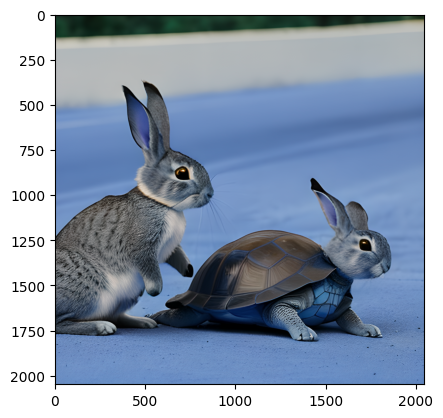

In [98]:
path_img = '/content/testing/ai1.png'
find_out(path_img)